In [ ]:
! pip install -U spacy
! python -m spacy download es_core_news_lg

In [ ]:
import spacy

nlp = spacy.load("es_core_news_lg")

# Vectores de palabras

Los vectores de palabras son números que representan a las palabras de acuerdo a la similitud semántica entre ellas.

Cuando se construyen los modelos de lingüística computacional con inteligencia artificial (como los de spaCy), se calcula la frecuencia de aparición de cada par de palabras en cada documento. A los pares que aparecen más, se les asigna una representación más cercana entre sí. Esto es lo que hace posible que calculemos la similitud semántica entre palabras y textos.


Por ejemplo, si en el documento 1 aparece dos veces la palabra "papa" junto a "frita", en el documento 2 aparecen 5 veces juntas, etc (se cuenta en el número de documentos que se le metan al algoritmo), entonces el modelo asociará como semánticamente similares a esas dos palabras.

La intuición detrás de esto es que las palabras adquieren su significado a partir de las palabras que aparecen cerca de ella frecuentemente.


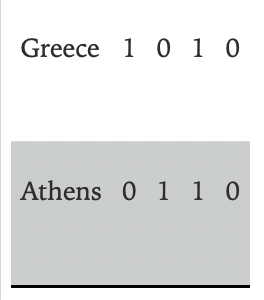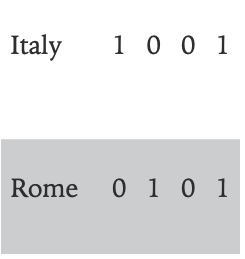

En las imágenes anteriores, tenemos cuatro palabras codificadas con simples *bits*. 

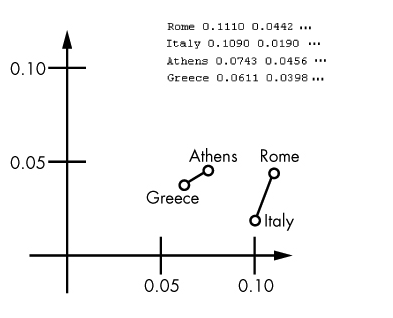

spaCy nos permite obtener la similitud semántica entre textos usando esta intuición. Las palabras que se encuentren más cercanas entre sí, tendrán una similitud más alta. Las que esten más alejadas, tendrán menos similitud.


In [ ]:
palabra1 = 'Roma'
palabra2 = 'Italia'
palabra3 = 'Oaxaca'

In [ ]:
doc1 = nlp(palabra1)
doc2 = nlp(palabra2)
doc3 = nlp(palabra3)

In [ ]:
doc1.similarity(doc2)

0.6668110373072821

In [ ]:
doc1.similarity(doc3)

0.15442820998625303

Observamos que la función `similarity`, aplicada a las variables `doc1` y `doc2`, regresa una similitud semántica de `66.68%`, mientras que para `doc1` y `doc2` sólo `15.44%`. 

Esto tiene sentido, pues las palabras *Roma* e *Italia* son más similares semánticamente a las palabras *Roma* y *Oaxaca*.

In [ ]:
similitud1 = doc1.similarity(doc2)
similitud2 = doc1.similarity(doc3)

if similitud1 > similitud2:
  print('Roma e Italia son más similares que Italia y Oaxaca')
else:
  print('Roma e Italia son menos similares que Italia y Oaxaca')

Roma e Italia son más similares que Italia y Oaxaca


Carguemos la base de datos de detección de sexismo nuevamente para evaluar similitud semántica entre varios tuits.

In [ ]:
import pandas as pd

ruta = '/ datos de detección de sexismo'

datos = pd.read_csv(ruta, sep="\t")
datos.drop(['test_case', 'id', 'source', 'task1', 'task2'], axis=1, inplace=True)
datos = datos[datos['language'] != 'en']
datos

,language,text
3436,es,Nadie te va a tratar tan bien como un hombre q...
3437,es,"@lindagisela74 Que rica putita obediente, afor..."
3438,es,@BicireporteraDF Yo lo hice a los 18 años por ...
3439,es,las cosas q sueño son indicios de que yo enrea...
3440,es,"Pero a la niña le gustó desde que lo vió, así ..."
...,...,...
6972,es,"Estamos igual sin pareja, pero puedes besar a ..."
6973,es,2020 hijo de re mil putas
6974,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975,es,@safetyaitana mi madre dice q va fea y i agree


Observemos los textos contenidos en la columna `text`, índices `3436` y `3437`.

In [ ]:
datos['text'][3436]

In [ ]:
datos['text'][3437]

Ahora calculemos la similitud semántica entre ambos textos, usando la función `similarity`. 

Recordemos que para usar dicha función **es necesario** primero procesar a los textos por el modelo de lenguaje que hemos guardado previamente en la variable `nlp`.

In [ ]:
doc1 = nlp(datos['text'][3436])
doc2 = nlp(datos['text'][3437])

In [ ]:
doc1.similarity(doc2)

0.558201961900636

**Ejercicio:** Calcular la similitud entre dos oraciones comparando sólo los sustantivos dentro de `doc1` y `doc2`.

¿Aumenta o disminuye el cálculo de la similitud?

In [ ]:
lista1 = []
lista2 = []

for token in doc1:
  if token.pos_ == 'NOUN':
    lista1.append(token)

for token in doc2:
  if token.pos_ == 'NOUN':
    lista2.append(token)

In [ ]:
print(lista2[2], lista2[0])

In [ ]:
lista2[2].similarity(lista2[0])

Hagamos funciones que automaticen:

1. Carga de datos en variables de pandas
2. Eliminación de columnas en variables de pandas
3. Cálculo de estadísticas básicas

## 1. Carga de datos en variables de pandas

1.1 **nombre:** cargar_datos

1.2 **entradas/parámetros:** ruta_con_datos

1.3 **procedimentimiento:** cargar datos de un archivo .csv en una variable de pandas

1.4 **salida/output:**: variable de pandas con datos


In [ ]:
def cargar_datos(ruta_con_datos):

  import pandas as pd
  datos = pd.read_csv(ruta_con_datos, sep="\t")

  return datos

In [ ]:
datos_nuevos = cargar_datos('/content/drive/MyDrive/NLP/intro a pln - 2/NLP - UNAM 2022/sesión 0/paises.csv')

## 2. Eliminación de columnas en variables de pandas

2.1 **nombre:** elimina_columnas_en_pandas

2.2 **entradas/parámetros:**: variable_pandas, columnas_a_eliminar

2.3 **procedimiento:** tome a variable_pandas y elimine las columnas en columnas_a_eliminar

2.4 **salida:** variable_pandas_sin_columnas_eliminadas

In [ ]:
def elimina_columna_en_pandas(variable_pandas, columnas_a_eliminar):

  import pandas as pd

  variable_pandas.drop([columnas_a_eliminar], axis=1, inplace=True)

  return variable_pandas

In [ ]:
datos_sin_columna_afganistan = elimina_columna_en_pandas(datos_nuevos, 'Afganistán,')

In [ ]:
datos_sin_columna_afganistan

""
0
1
2
3
4
...
241
242
243
244


## 3. Estadísticas básicas

3.1 **nombre:** estadistica_basicas

3.2 **entradas/parámetros:**: variable_pandas

3.3 **procedimiento:** tome a variable_pandas y va a imprimir estadísticas básicas de los datos en esa variable de pandas introducida

3.4 **salida:** estadisticas_basicas

In [ ]:
def estadisticas_basicas(variable_pandas):
  estadisticas = variable_pandas.value_counts(normalize=True)
  return estadisticas

In [ ]:
estadisticas_basicas(datos['language'])

En este [link](https://helboukkouri.github.io/embedding-visualization/#/?_k=0zrugk) se pueden visualizar diferentes vectores de palabras. Cada uno esta implementado con un algoritmo y datos diferentes, por eso dan visualizaciones distintas entre sí.

Esta es una manera interactiva de entender qué son los vectores de palabras y qué pasa internamente en spaCy cuando usamos `similarity`.